# Bank Marketing Prediction Project
**Objective:** Build a machine learning model to predict whether a client will subscribe to a term deposit.

## Step 1: Data Loading
Load the dataset and inspect its structure.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pickle

# Load the dataset
data = pd.read_csv('bank-additional/bank-additional.csv', sep=';')

# Inspect the data
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Step 2: Data Cleaning
Handle missing values, check for duplicates, and ensure data types are correct.

In [3]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

# Display data types
print(data.dtypes)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
0
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Step 3: Data Preprocessing
Encode categorical variables and scale numerical features.

In [ ]:
# Encode categorical variables using One-Hot Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Scale numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define the preprocessed dataset (X for features, y for target)
X = data.drop('y_yes', axis=1)  # Features
y = data['y_yes']               # Target variable

# Save feature names after preprocessing
feature_names = X.columns
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

print("Feature names saved to 'feature_names.pkl'")

Feature names saved to 'feature_names.pkl'


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,...,False,False,False,False,False,False,False,True,False,False
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,...,False,False,False,False,False,False,False,True,False,False
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,...,False,False,False,False,False,False,True,True,False,False
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,...,False,False,False,False,False,False,False,True,False,False
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,...,True,False,False,True,False,False,False,True,False,False


## Step 4: Exploratory Data Analysis (EDA)
Visualize distributions, correlations, and relationships in the data.

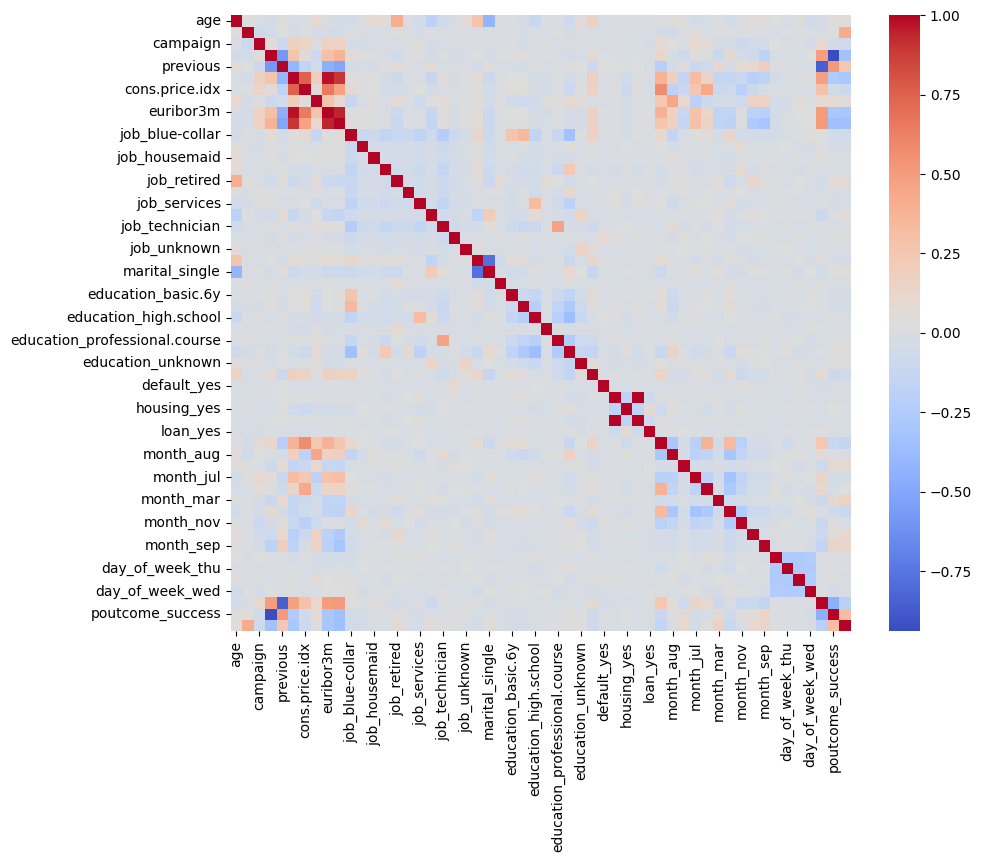

In [5]:
# Example EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

## Step 5: Feature Selection
Use feature selection techniques to choose relevant features.

In [6]:
# Example: Feature selection using correlation threshold
correlation_threshold = 0.1
correlation_matrix = data.corr()
relevant_features = correlation_matrix.index[correlation_matrix['y_yes'].abs() > correlation_threshold]
print(relevant_features)

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'nr.employed', 'contact_telephone', 'month_dec', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success', 'y_yes'],
      dtype='object')


## Step 6: Model Selection
Train and evaluate multiple models.

In [ ]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train-test split
X = data.drop('y_yes', axis=1)
y = data['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors:")
print(classification_report(y_test, y_pred))

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

SVM:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.64      0.38      0.48        92

    accuracy                           0.91       824
   macro avg       0.78      0.68      0.71       824
weighted avg       0.89      0.91      0.90       824

K-Nearest Neighbors:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95       732
        True       0.60      0.34      0.43        92

    accuracy                           0.90       824
   macro avg       0.76      0.65      0.69       824
weighted avg       0.88      0.90      0.89       824

Logistic Regression:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       732
        True       0.61      0.41      0.49        92

    accuracy                           0.91       824
   macro avg       0.77      0.69      0.72       824
weighted avg       0.89    

## Step 7: Hyperparameter Tuning
Optimize the hyperparameters of the best-performing model.

In [ ]:
# Hyperparameter tuning example using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
   # 'n_estimators': [50, 100, 200],
    #'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    'n_neighbors': [3, 5, 7, 9]
}

#grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
#grid_search.fit(X_train, y_train)
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score: {f1}')
#print("Best Parameters:", grid_search.best_params_)

ValueError: Invalid parameter 'max_depth' for estimator KNeighborsClassifier(). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].

## Step 8: Evaluation
Evaluate the final model on the test set.

In [24]:
# Evaluate final model
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)
print("Final Model:")
print(classification_report(y_test, y_pred_final))


Final Model:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95       732
        True       0.61      0.37      0.46        92

    accuracy                           0.90       824
   macro avg       0.77      0.67      0.70       824
weighted avg       0.89      0.90      0.89       824



## Step 8: Evaluation 

This code saves the trained machine learning model (final_model) to a file named final_model.pkl using Python’s pickle module, enabling the model to be reused later for predictions or deployment without retraining.

In [10]:
import pickle

# Example: Assume 'final_model' is your trained model
final_model = grid_search.best_estimator_  # Or any trained model

# Save the model to a file
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## Step 9: Additional Visualizations and Findings

To improve the presentation and understanding of the data, the following visualizations are added:
1. **Distribution of Target Variable**: Understand the balance of the target classes (subscribed vs. not subscribed).
2. **Age Distribution**: Visualize the distribution of the `age` feature.
3. **Correlation Heatmap**: Identify relationships between numerical features.
4. **Subscription Rate by Job**: Analyze the subscription rates across different job categories.
5. **Balance Distribution by Subscription**: Compare the `balance` between clients who subscribed and those who did not.
6. **Call Duration by Subscription**: Explore the relationship between call duration and subscription.

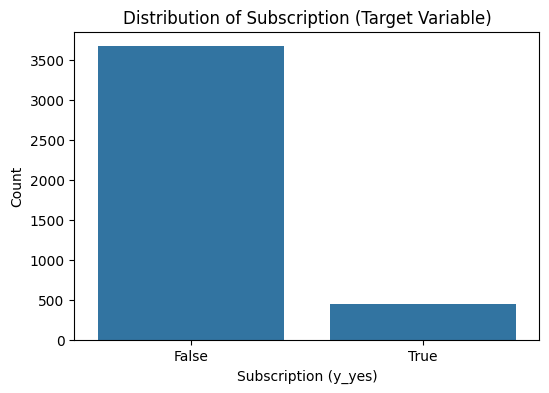

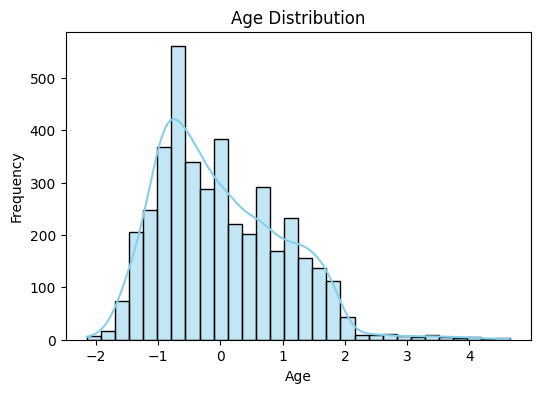

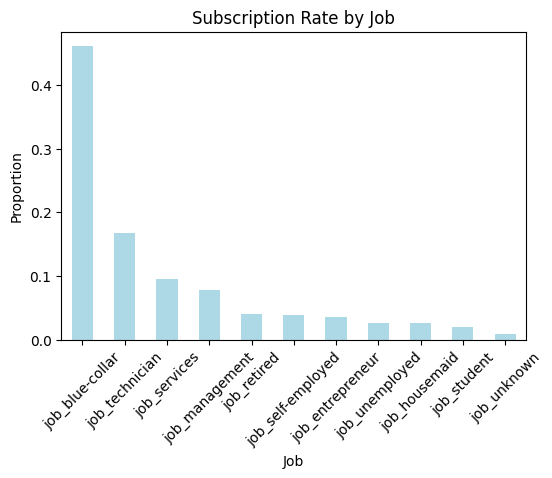

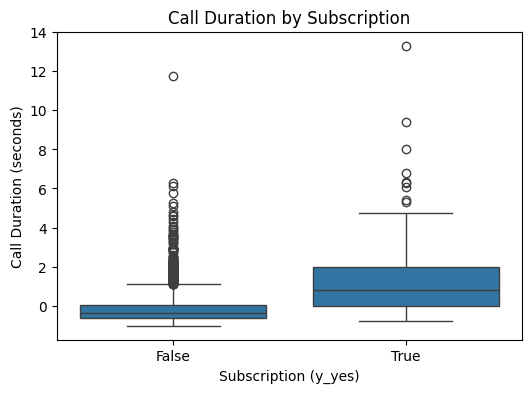

In [23]:
# Visualization 1: Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y_yes', data=data)
plt.title('Distribution of Subscription (Target Variable)')
plt.xlabel('Subscription (y_yes)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Age Distribution
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Subscription Rate by Job
# Extract columns related to 'job'
job_columns = [col for col in data.columns if col.startswith('job_')]
job_subscription = data[job_columns].idxmax(axis=1).value_counts(normalize=True)

# Plot the aggregated job subscription data
plt.figure(figsize=(6, 4))
job_subscription.plot(kind='bar', color='lightblue')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Call Duration by Subscription
plt.figure(figsize=(6, 4))
sns.boxplot(x='y_yes', y='duration', data=data)
plt.title('Call Duration by Subscription')
plt.xlabel('Subscription (y_yes)')
plt.ylabel('Call Duration (seconds)')
plt.show()